In [1]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
from datetime import datetime, timedelta

In [2]:
# Set the date and file name in the URL 

tdelta = datetime.today() + timedelta(days=-1)
dateformat = '%m-%d-%Y'
date = tdelta.strftime(dateformat)
extension = '.csv'

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/%s%s' % (date, extension)

In [3]:
# Load as DataFrame & clean up

df = pd.read_csv(url)
df = df.dropna(axis=0, subset=['Lat'])
df = df[df['Confirmed'] > 0]
df = df.fillna(0)

display(df)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,0.0,0,0,Afghanistan,2021-04-27 04:20:52,33.939110,67.709953,59015,2592,52520.0,3903.0,Afghanistan,151.599062,4.392104
1,0.0,0,0,Albania,2021-04-27 04:20:52,41.153300,20.168300,130606,2379,106465.0,21762.0,Albania,4538.397387,1.821509
2,0.0,0,0,Algeria,2021-04-27 04:20:52,28.033900,1.659600,121112,3217,84440.0,33455.0,Algeria,276.189554,2.656219
3,0.0,0,0,Andorra,2021-04-27 04:20:52,42.506300,1.521800,13083,124,12519.0,440.0,Andorra,16932.634440,0.947795
4,0.0,0,0,Angola,2021-04-27 04:20:52,-11.202700,17.873900,25710,583,23288.0,1839.0,Angola,78.226101,2.267600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,0.0,0,0,Vietnam,2021-04-27 04:20:52,14.058324,108.277199,2852,35,2516.0,301.0,Vietnam,2.929979,1.227209
3979,0.0,0,0,West Bank and Gaza,2021-04-27 04:20:52,31.952200,35.233200,292052,3184,264660.0,24208.0,West Bank and Gaza,5724.920297,1.090217
3980,0.0,0,0,Yemen,2021-04-27 04:20:52,15.552727,48.516388,6183,1205,2630.0,2348.0,Yemen,20.730258,19.488921
3981,0.0,0,0,Zambia,2021-04-27 04:20:52,-13.133897,27.849332,91378,1248,89678.0,452.0,Zambia,497.052974,1.365755


In [4]:
# Direct to mapbox token file

px.set_mapbox_access_token(open('.mapbox_token').read())

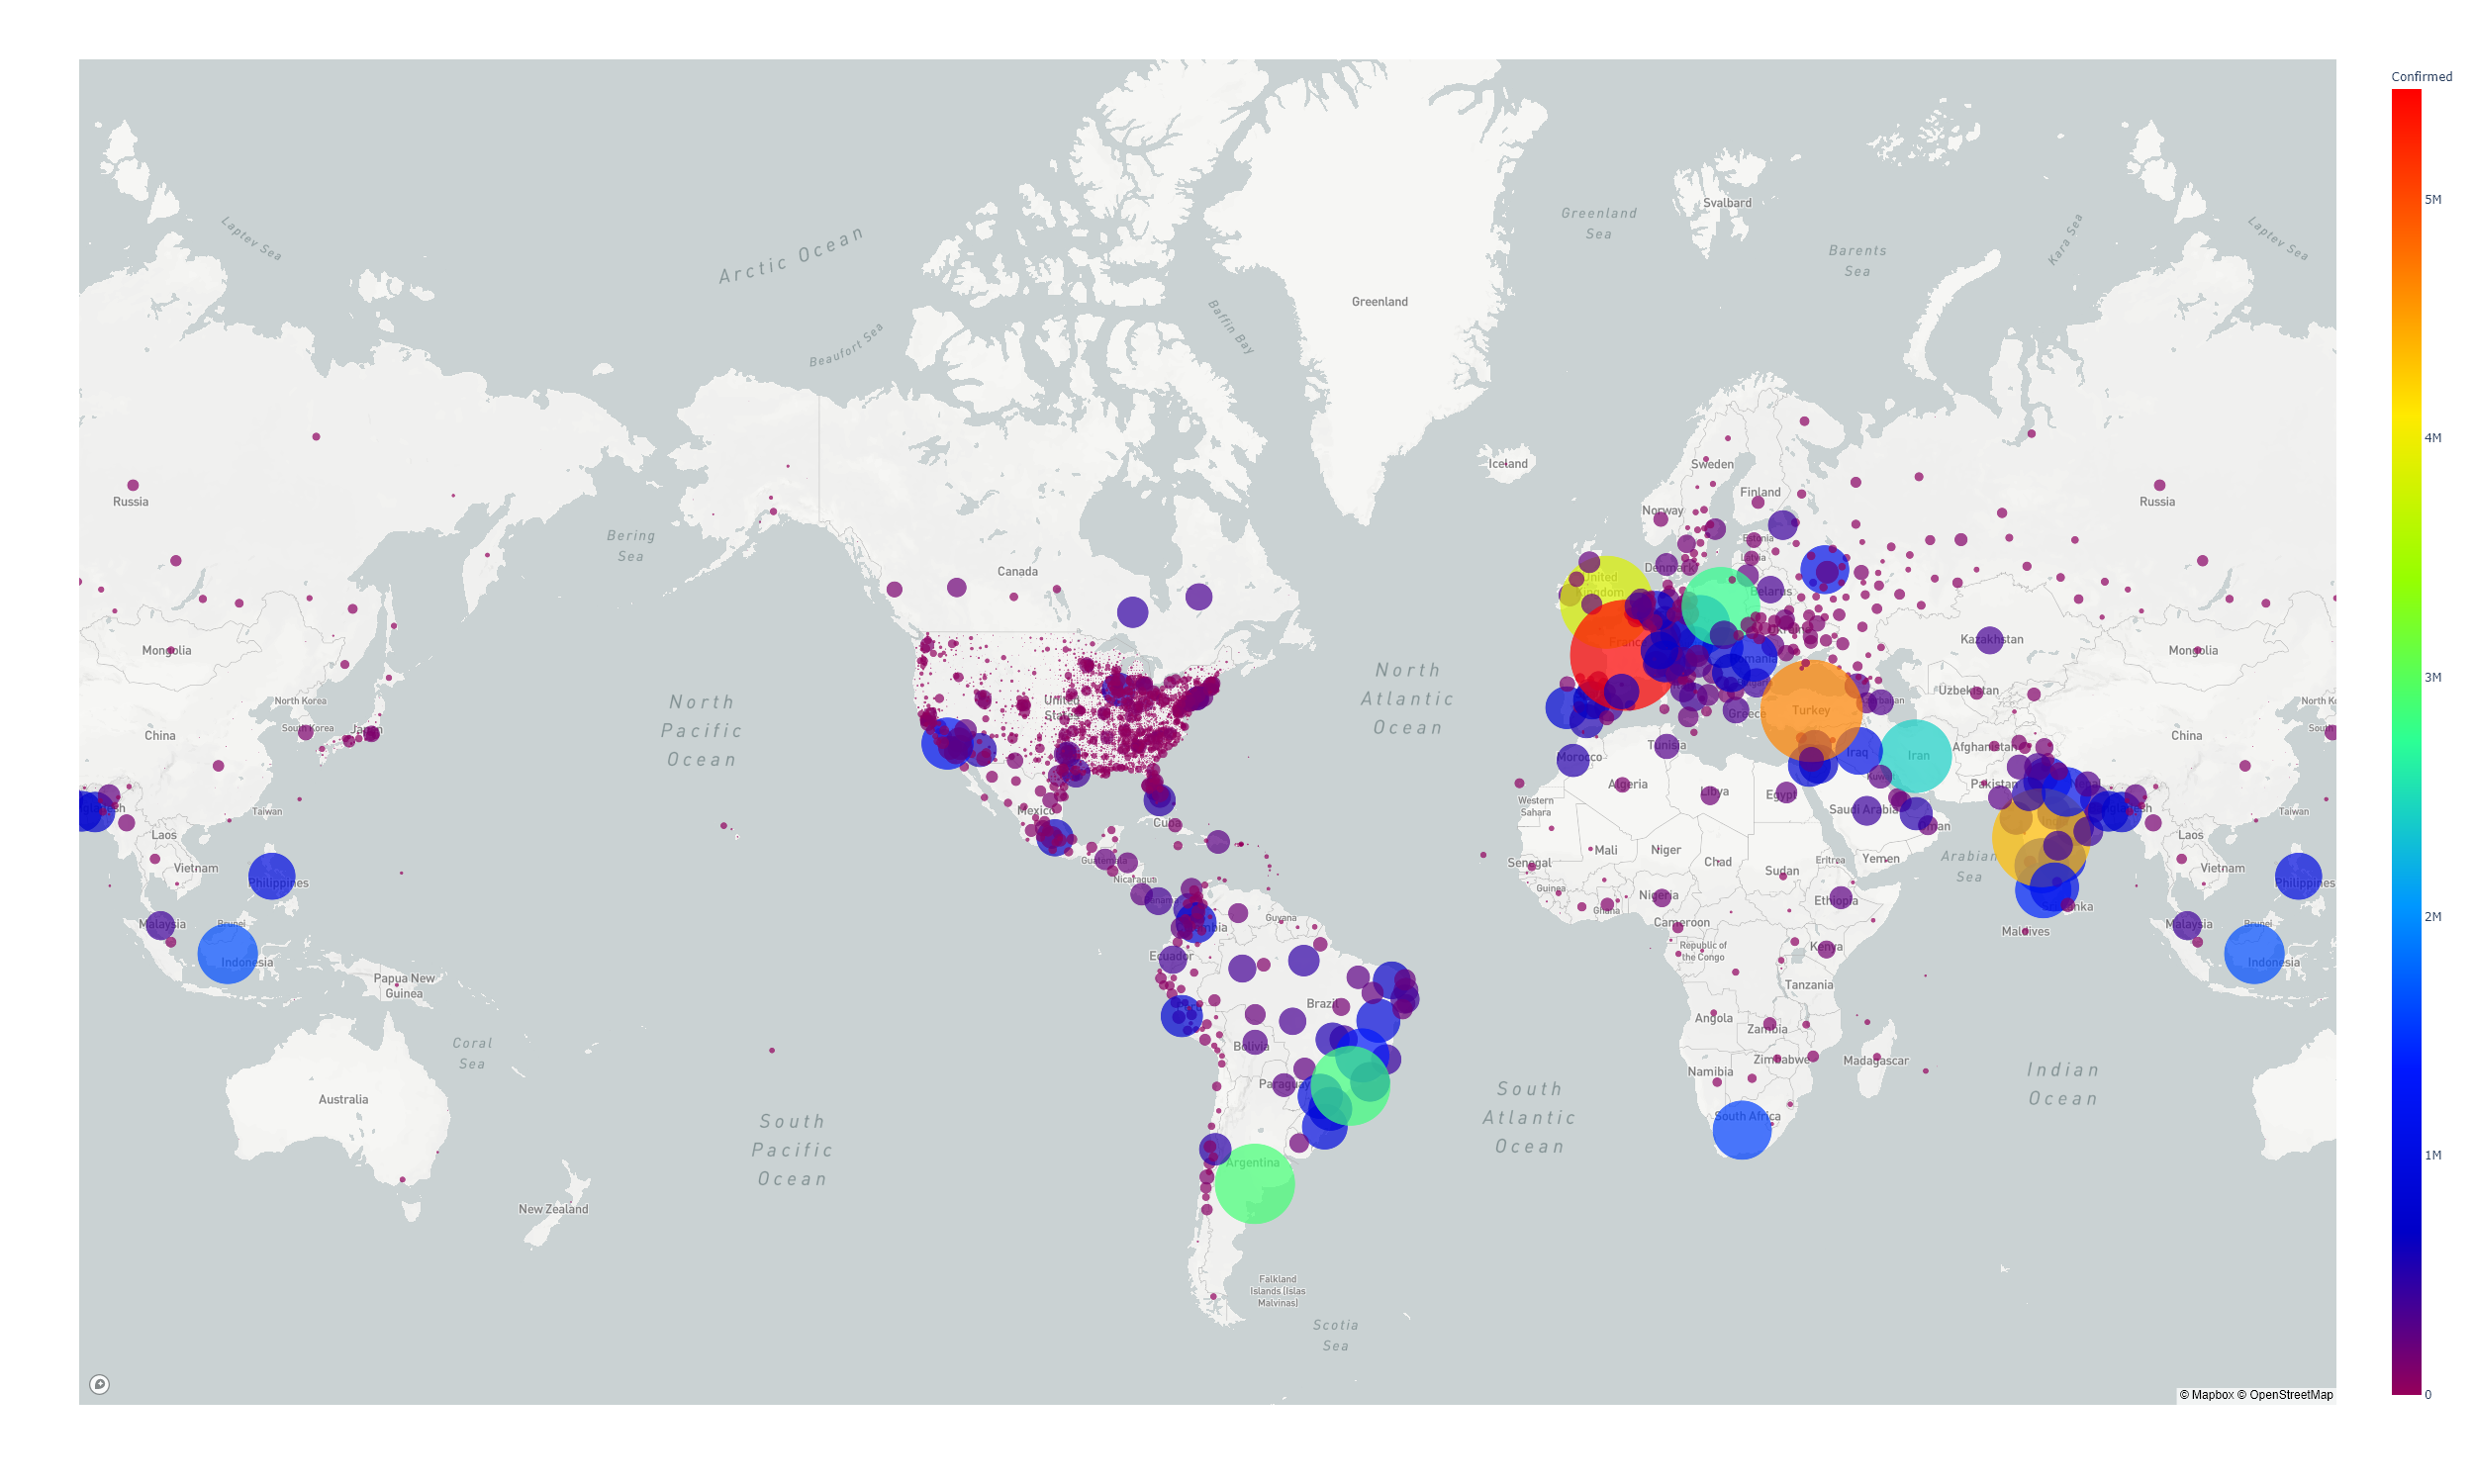

In [5]:
# Render in Plotly

fig = px.scatter_mapbox(df, lat='Lat', lon='Long_',
                        color='Confirmed',
                        size='Confirmed',
                        color_continuous_scale=px.colors.sequential.Rainbow,
                        size_max=80,
                        zoom=2,
                        mapbox_style='light')

fig.show(renderer='png', width=2500, height=1500)